Delete this block before submission

Mardown cheat cheat : https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#blockquotes

Things to do : 
- Don't forget of the statistical significance aspects of results, for every result, criticize that when interpreting
- 


### Packages required to run this notebook : TO DO complete this
- pandas
- numpy
- matplotlib
- seaborn

- texblob : 
    - conda install -c conda-forge textblob
- nltk:
    - conda install -c anaconda nltk
- flair:
    - pip install flair (conda install doesn't start)

# Project Milestone2 - Group Concatsanddogs

# The use of women's rights and gender equality rhetoric in the US

### Research Question 4 :

**What is the sentiment analysis of the context of the quotation containing women's rights mention?**

**Can we link the sentiment to the use of women's rights ideology?**

## Librairies

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
#nltk.download('vader_lexicon')

In [12]:
# Changing some pandas default appearance settings 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html
# pd.options.display.max_colwidth = 200
# pd.options.display.max_rows = 100

In [13]:
# pd.reset_option("^display")

In [14]:
#NLP libraries
import spacy, nltk, gensim, sklearn

In [15]:
#Vader
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [16]:
sns.set_theme() # sns.set_theme(rc={'figure.figsize':(20,3)})
sns.set_style("whitegrid")

In [17]:
PATH_GENERATED_DATA = 'generated_data/'

## Loading the selected quotes dataframe

In [18]:
# loading the dataframe with selected quotes and additional attributes
df = pd.read_pickle(PATH_GENERATED_DATA+'df_enriched.pkl', compression='infer', storage_options=None)

In [19]:
df.head(2)

,quoteID,quotation,speaker,date,numOccurrences,probas,urls,aliases,date_of_birth,nationality,...,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,label,candidacy,type,religion
0,2015-03-09-004706,Anything less than women winning 50 per cent o...,Katy Gallagher,2015-03-09 12:30:00,1,"[[Katy Gallagher, 0.5872], [None, 0.4128]]",[http://www.smh.com.au/act-news/women-need-to-...,"[Katherine Gallagher, Katherine Ruth Gallagher]",[+1970-03-17T00:00:00Z],Australia,...,1349152158,NaN,None,politician,Australian Labor Party,NaN,Katy Gallagher,None,item,NaN
1,2017-05-11-081817,"more family-friendly and flexible workplaces, ...",Katy Gallagher,2017-05-11 00:00:37,1,"[[Katy Gallagher, 0.5596], [None, 0.4404]]",[http://www.mediamaxnetwork.co.ke/news/325569/...,"[Katherine Gallagher, Katherine Ruth Gallagher]",[+1970-03-17T00:00:00Z],Australia,...,1349152158,NaN,None,politician,Australian Labor Party,NaN,Katy Gallagher,None,item,NaN


In [20]:
print(f'The dataframe has {len(df)} entries')

The dataframe has 55328 entries


In [21]:
df['quotation'].head(2)

0    Anything less than women winning 50 per cent o...
1    more family-friendly and flexible workplaces, ...
Name: quotation, dtype: object

## Sentiment analysis prep

In [22]:
quote = df['quotation'].iloc[0]

Vader : Gives a compound score from -1 to 1 ranging from negativity to positivity.

In [23]:
analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores(df['quotation'].loc[1])

In [24]:
# example use :
analyzer.polarity_scores(quote)['compound']


0.6271

In [25]:
analyzer.polarity_scores(quote)

{'neg': 0.097, 'neu': 0.697, 'pos': 0.205, 'compound': 0.6271}

Text blob :

In [26]:
from textblob import TextBlob

# polarity score function :
def polarity_blob(text):
    return TextBlob(text).sentiment.polarity

# subjectivity score function :
def subjectivity_blob(text):
    return TextBlob(text).sentiment.subjectivity

In [27]:
# example use :
polarity_blob(quote)

0.2532828282828283

In [28]:
TextBlob(quote).sentiment

Sentiment(polarity=0.2532828282828283, subjectivity=0.5868686868686869)

Flair : A more advandced model that uses pretrained RNNs and pretrained text embeddings: 

source : https://github.com/flairNLP/flair/pull/1613

In [29]:
from flair.models import TextClassifier
from flair.data import Sentence

In [30]:
# load tagger ( this could take a while, it's approx ~1 gb to download)
classifier = TextClassifier.load('sentiment-fast')

def flair_label(text = 'test text'):
    sentence = Sentence(text)
    classifier.predict(sentence)
    return sentence.labels[0].score

2021-12-13 11:29:26,467 loading file C:\Users\Younes\.flair\models\sentiment-en-mix-ft-rnn_v8.pt


In [31]:
# example use :
test = Sentence("enormously entertaining for moviegoers of any age .")
classifier.predict(test)
print(test.labels)
print(flair_label(text = "enormously entertaining for moviegoers of any age .")) 

[POSITIVE (0.9987)]
0.9987253546714783


## Sub question 1 : What is the sentiment analysis of the context of the quotations containing women's rights mention?

In [69]:
# only add tokenizer as preprocessing here ( I think we don't need more for now)

In [70]:
nlp = spacy.load('en')
# nlp.remove_pipe('parser')
# nlp.remove_pipe('tagger')
# nlp.remove_pipe('ner')
# nlp.remove_pipe('textcat')

In [71]:
print(df['quotation'].loc[1], '\n')
print(nlp(df['quotation'].loc[1]))

more family-friendly and flexible workplaces, and affordable child care, for everyone 

more family-friendly and flexible workplaces, and affordable child care, for everyone


In [72]:
df['sentiment'] = df['quotation'].apply(lambda x : analyzer.polarity_scores(x)['compound'])

In [73]:
df['sentiment'].head()

0    0.6271
1    0.6557
2    0.6557
3    0.9460
4    0.6705
Name: sentiment, dtype: float64

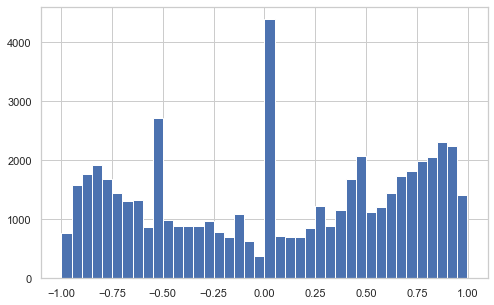

In [115]:
df['sentiment'].hist(bins=40, figsize = [8,5])
plt.show()

There seems to be a lof of quotes that are classified as neutral, but we can see that the data is polarised 

In [75]:
# Save the dataframe containing the sentiment scores 
df.to_pickle(PATH_GENERATED_DATA+'df_enriched_w_sentiment.pkl', compression='infer', protocol=5, storage_options=None)

In [32]:
# Load the dataframe containing sentiment scores
df = pd.read_pickle(PATH_GENERATED_DATA+'df_enriched_w_sentiment.pkl', compression='infer', storage_options=None)

In [33]:
df.head(2)

,quoteID,quotation,speaker,date,numOccurrences,probas,urls,aliases,date_of_birth,nationality,...,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,label,candidacy,type,religion,sentiment
0,2015-03-09-004706,Anything less than women winning 50 per cent o...,Katy Gallagher,2015-03-09 12:30:00,1,"[[Katy Gallagher, 0.5872], [None, 0.4128]]",[http://www.smh.com.au/act-news/women-need-to-...,"[Katherine Gallagher, Katherine Ruth Gallagher]",[+1970-03-17T00:00:00Z],Australia,...,NaN,None,politician,Australian Labor Party,NaN,Katy Gallagher,None,item,NaN,0.6271
1,2017-05-11-081817,"more family-friendly and flexible workplaces, ...",Katy Gallagher,2017-05-11 00:00:37,1,"[[Katy Gallagher, 0.5596], [None, 0.4404]]",[http://www.mediamaxnetwork.co.ke/news/325569/...,"[Katherine Gallagher, Katherine Ruth Gallagher]",[+1970-03-17T00:00:00Z],Australia,...,NaN,None,politician,Australian Labor Party,NaN,Katy Gallagher,None,item,NaN,0.6557


### Sentiment in function of time

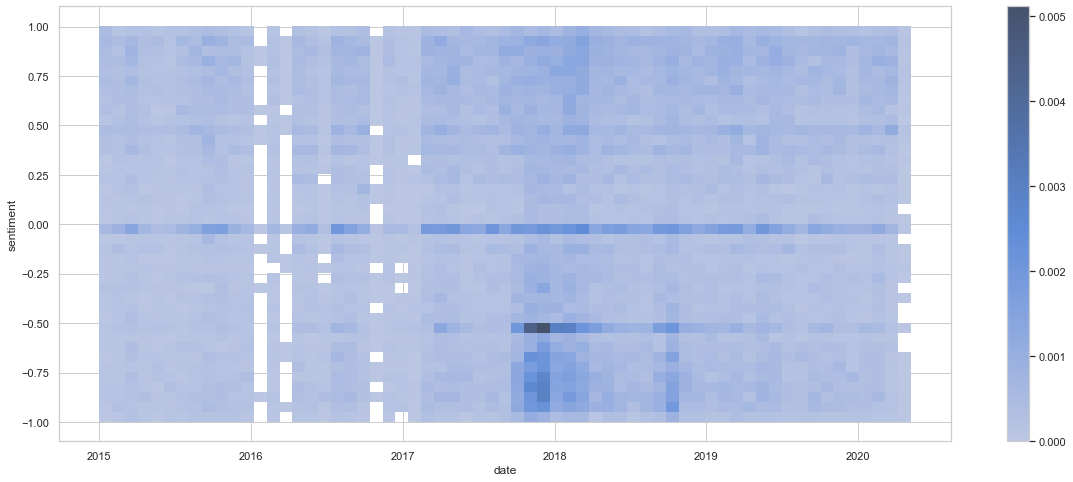

In [64]:
plt.figure(figsize=(20,8))
sns.histplot(df[['date','sentiment']], x="date", y="sentiment", stat='proportion',cbar=True,binwidth=(31,0.05)) # `count` `frequency`
plt.savefig("./img/sentiment_heatmap.jpg",dpi=400)
plt.show()

Seems like there were a lot of negative quotes end of 2017
We could maybe use the list provided by wikipedia : https://en.wikipedia.org/wiki/2017_in_the_United_States#October to see if there were quotes about that
 
>Tough talk on immigration: Shortly after taking office in January, President Trump sought to make good on his “America First” campaign promise by imposing a series of contentious travel bans on citizens from several Muslim-majority nations.

>Federal district courts struck down implementation of the bans, though a Supreme Court ruling in December 2017 reversed the lower courts’ decisions, allowing the administration to fully implement the bans.

>Trump also continued to promote his election campaign idea of a border wall with Mexico that he says will help quell illegal immigration from Mexico and points south.

https://www.history.com/topics/21st-century/2017-events#section_1

---> maybe do some NER to recognize events ?

### Time events analysis

In [35]:
# Select the negatives quotes around 2018
#last two months of 2017
end_2017_df = df[ (df['date'] > '2017-11-01') & (df['date'] < '2018-01-01')]
#negative sentiments
neg_end_2017_df = end_2017_df[end_2017_df['sentiment']<-0.5]

In [36]:
len(neg_end_2017_df)

2283

In [37]:
#pd.options.display.max_columns = 150
#neg_end_2017_df.head(20)['quotation']

In [38]:
KEYWORDS_WAGES_EQUALITY =(
    'equal pay',
    'Equal wages',
     'men pay',
     'pay percentage',)

KEYWORDS_EQUALITY = (
'Equal opportunities',
'Equal rights',
'Equal status',
'Gender equality',
'gender equity',
'gender gap',
 'percentage men',
 'women\'s right',
 'Women empowerment',
 'Women emancipation',
  'Gender discrimination',
 'Men and women',
 'women and men',
 'women oppression',
 'struggle of girls',
 'struggle of women',
 'war against women',
 'oppression of girls',
 'oppression of women',
 'women oppression',
 "women's opression",
 'liberate women',
 'Male oppression',
 'Female oppression',
 'Patriarchal culture',
 'gender equality',
 'women girls',
 'girls women',
 'rates women',
 'women according',
 'share women',
 'women movement',
 'see women',
 'gender stereotypes',
 'women representation',
 'sex discrimination',
 'women rights',
 'woman time',
 'based gender',
 'entirely female',
     'women immigration',
 "women's participation",)
KEYWORDS_REPRODUCTION_WORK = (
'Exploitation of women',
 'child care',
)
KEYWORDS_SEXUAL = (
'Sexual harrasment',
'abuse of women',
'sexual harassment',
'women victim',
'gender-based violence',
)
KEYWORDS_TRANS = ('trans ')
KEYWORDS_ABORTION = ('abortion')
KEYWORDS_INDIGENEOUS = ('Indigenous')
KEYWORDS_REPRESENTATION = ('female mayors','female candidates')
KEYWORDS_FEMONAT = ('Western women',
 'non-western woman',
 'Muslim women',
 'Muslim woman',
 'niqab ban',
 'religious oppression')

In [39]:
def add_subtopic(df):
    df['subtopic'] = np.where(df.quotation.str.contains('|'.join(KEYWORDS_FEMONAT)), "islam",
                 np.where(df.quotation.str.contains('|'.join(KEYWORDS_REPRESENTATION)), "representation",
                 np.where(df.quotation.str.contains(KEYWORDS_INDIGENEOUS), "indigenous",
                 np.where(df.quotation.str.contains(KEYWORDS_ABORTION), "abortion",
                 np.where(df.quotation.str.contains(KEYWORDS_TRANS), "trans",    
                 np.where(df.quotation.str.contains('|'.join(KEYWORDS_SEXUAL)), "sexual", 
                 np.where(df.quotation.str.contains('|'.join(KEYWORDS_WAGES_EQUALITY)), "wages equality",
                 np.where(df.quotation.str.contains('|'.join(KEYWORDS_REPRODUCTION_WORK)), "reproductive work",  
                 np.where(df.quotation.str.contains('|'.join(KEYWORDS_EQUALITY)),"equality","other")))))))))
    return df

In [40]:
add_subtopic(neg_end_2017_df)

C:\Users\Younes\AppData\Local\Temp/ipykernel_2428/2519758697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['subtopic'] = np.where(df.quotation.str.contains('|'.join(KEYWORDS_FEMONAT)), "islam",


,quoteID,quotation,speaker,date,numOccurrences,probas,urls,aliases,date_of_birth,nationality,...,US_congress_bio_ID,occupation,party,academic_degree,label,candidacy,type,religion,sentiment,subtopic
754,2017-11-21-082375,"No matter your party, no matter your politics,...",Tom Perez,2017-11-21 13:44:47,1,"[[Tom Perez, 0.8127], [None, 0.1826], [Al Fran...",[http://www.masslive.com/politics/index.ssf/20...,"[Tom Perez, Thomas E. Perez, Thomas Edward Perez]","[+1961-10-07T00:00:00Z, +1961-01-07T00:00:00Z]",United States of America,...,None,politician,Democratic Party,NaN,Thomas Perez,None,item,NaN,-0.6184,sexual
854,2017-11-16-172692,Women who come forward are brave and deserve t...,Elizabeth Warren,2017-11-16 14:25:41,4,"[[Elizabeth Warren, 0.495], [None, 0.3292], [C...",[http://www.masslive.com/politics/index.ssf/20...,"[Elizabeth Ann Warren, Senator Warren, Elisabe...",[+1949-06-22T00:00:00Z],United States of America,...,W000817,jurist,Democratic Party,bachelor's degree,Elizabeth Warren,[Q28220813],item,Methodism,-0.5423,sexual
855,2017-11-16-163952,We're not going to fix the problems of sexual ...,Elizabeth Warren,2017-11-16 14:55:00,6,"[[Elizabeth Warren, 0.5309], [None, 0.339], [S...",[http://feeds.latimes.com/~r/latimes/entertain...,"[Elizabeth Ann Warren, Senator Warren, Elisabe...",[+1949-06-22T00:00:00Z],United States of America,...,W000817,jurist,Democratic Party,bachelor's degree,Elizabeth Warren,[Q28220813],item,Methodism,-0.8750,sexual
863,2017-11-16-116217,The behavior reported today is unacceptable an...,Elizabeth Warren,2017-11-16 19:48:09,2,"[[Elizabeth Warren, 0.7688], [None, 0.1378], [...",[https://www.boston.com/news/politics/2017/11/...,"[Elizabeth Ann Warren, Senator Warren, Elisabe...",[+1949-06-22T00:00:00Z],United States of America,...,W000817,jurist,Democratic Party,bachelor's degree,Elizabeth Warren,[Q28220813],item,Methodism,-0.7089,sexual
865,2017-12-17-076169,Women are coming forward to tell stories of th...,Elizabeth Warren,2017-12-17 00:00:00,1,"[[Elizabeth Warren, 0.8229], [None, 0.1664], [...",[https://www.opednews.com/articles/Warren-Brow...,"[Elizabeth Ann Warren, Senator Warren, Elisabe...",[+1949-06-22T00:00:00Z],United States of America,...,W000817,jurist,Democratic Party,bachelor's degree,Elizabeth Warren,[Q28220813],item,Methodism,-0.5666,sexual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40533,2017-11-22-091474,recognizes and understands the seriousness of ...,Michael Padilla,2017-11-22 22:20:15,7,"[[Michael Padilla, 0.4456], [Michelle Lujan Gr...",[http://www.lmtonline.com/news/article/New-Mex...,None,[+1972-06-13T00:00:00Z],United States of America,...,None,politician,Democratic Party,NaN,Michael Padilla,None,item,NaN,-0.5574,sexual
40537,2017-11-24-027488,I don't think we should be spending government...,Mickey Kearns,2017-11-24 00:00:00,1,"[[Mickey Kearns, 0.7134], [None, 0.25], [Sam H...",[http://news.wbfo.org/post/tackling-sexual-har...,None,[+1943-04-18T00:00:00Z],Ireland,...,None,Gaelic football player,NaN,NaN,Mickey Kearns,None,item,NaN,-0.5423,sexual
40543,2017-11-16-085118,"Lessons on self-silencing and sexual harassment,",Cass R. Sunstein,2017-11-16 08:09:01,2,"[[Cass R. Sunstein, 0.9194], [None, 0.0807]]",[http://www.pressdemocrat.com/news/state/76071...,"[Cass Robert Sunstein, Cass R. Sunstein]",[+1954-09-21T00:00:00Z],United States of America,...,None,jurist,Democratic Party,NaN,Cass Sunstein,None,item,NaN,-0.5423,sexual
40548,2017-12-20-094235,That doesn't necessarily mean `believe in the ...,Megan McCabe,2017-12-20 11:04:36,1,"[[Megan McCabe, 0.8509], [None, 0.1325], [Al F...",[https://www.ncronline.org/news/opinion/distin...,None,None,NaN,...,None,actor,NaN,NaN,Megan McCabe,None,item,NaN,-0.8856,sexual


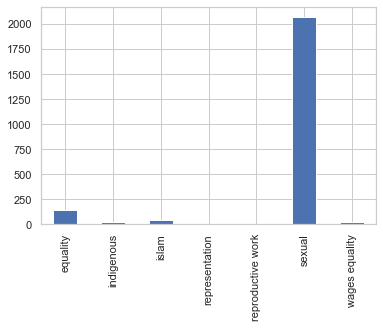

In [53]:
neg_end_2017_df['subtopic'].value_counts().sort_index().plot.bar(x='Target Value', y='Number of Occurrences')
plt.savefig("./img/sentiment_categ.jpg",dpi=400)

From this analysis it seems that the events are probably linked to some sexual harassment scandal...

### Overall Time analysis 

In [42]:
# sort dataframe by date
# df.sort_values(ascending=[True],by=['date'],inplace=True)
# df.head()

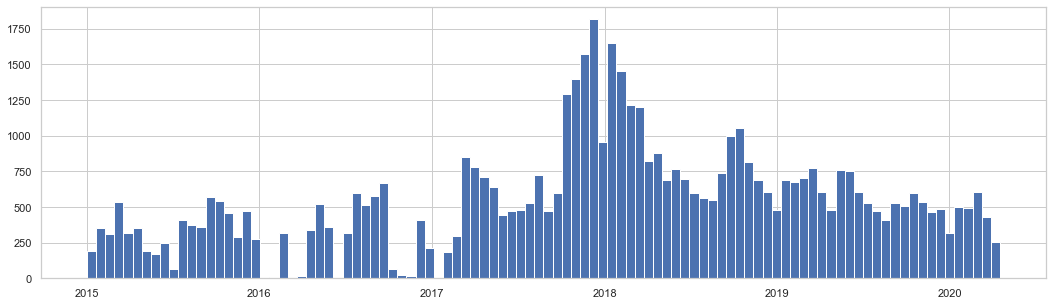

In [43]:
# quotes in function of time
df['date'].hist(bins = 100, figsize = [18,5])
plt.show() 
# this graph should probably go into a general presentation of our data instead of here 


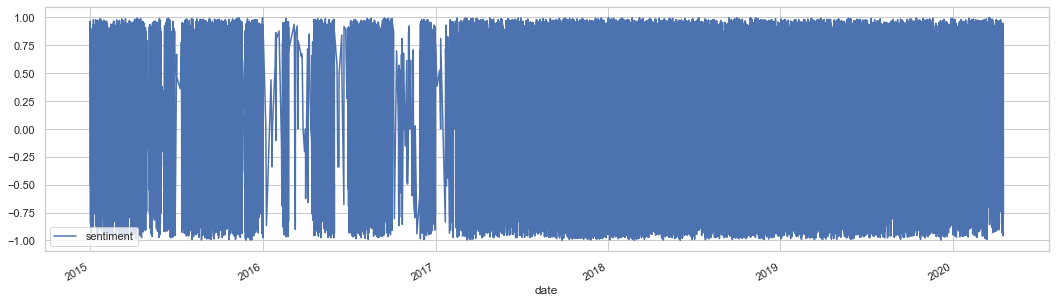

In [44]:
df.plot(x = 'date',y='sentiment', figsize = [18,5])
plt.show()
# not much info from this graph

#### separate the data into positive, negative, and neutral quotes

In [45]:
# take a threshold and separate the data in two : 
# threshold choice currently partly arbitrary
df_positive = df.query('sentiment > 0.25')
df_negative = df.query('sentiment < -0.25')
df_neutral  = df.query('sentiment > -0.25').query('sentiment < 0.25')

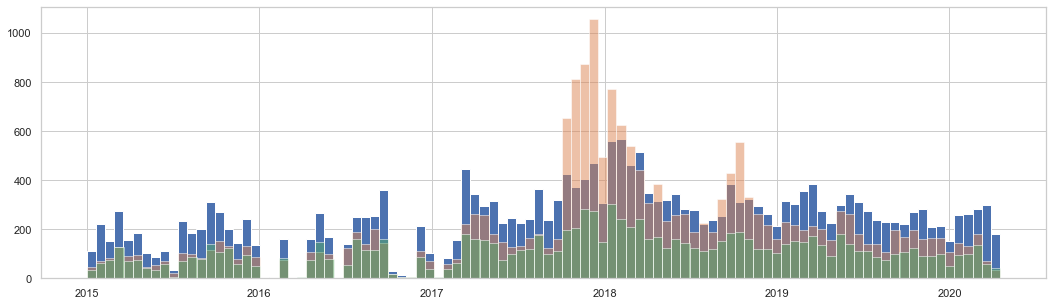

In [51]:
df_positive['date'].hist(bins = 100, figsize = [18,5])
df_negative['date'].hist(bins = 100, figsize = [18,5],alpha = 0.5)
# seems like around 2018 there were a lot of negative quotations
df_neutral['date'].hist(bins = 100, figsize = [18,5],alpha = 0.5)
plt.savefig("./img/sentiment_time_pos_neg_neu.jpg",dpi=400)
plt.show()


## Sub question 2 : Can we link the sentiment to the use of women's rights ideology?

- Seperate the speakers in function of their political party
- calculate the average of the compound score (from Vader) on their quotes. 
- show distribution in function of party

Maybe we will find a relation between the compound score and the general opinion of the party.

### Sentiment and political party

In [122]:
df.columns

Index(['quoteID', 'quotation', 'speaker', 'date', 'numOccurrences', 'probas',
       'urls', 'aliases', 'date_of_birth', 'nationality', 'gender',
       'lastrevid', 'ethnic_group', 'US_congress_bio_ID', 'occupation',
       'party', 'academic_degree', 'label', 'candidacy', 'type', 'religion',
       'sentiment'],
      dtype='object')

In [123]:
df['party'].nunique()

589

In [124]:
df['party'].unique()

array(['Australian Labor Party', nan, 'Democratic Party',
       'Liberal Party of Australia', 'Republican Party',
       'Liberal Party of Canada', 'Alberta Liberal Party',
       'independent politician',
       'Communist Party of India (Marxist–Leninist) Liberation',
       'African National Congress', 'National Party of Australia – NSW',
       'New Zealand National Party',
       'Minnesota Democratic–Farmer–Labor Party',
       'National Democratic Congress', 'Justice and Development Party',
       'New Democratic Party', 'Democratic Action Party',
       'Fiji First Party', 'Liberty Union Party',
       'New Democratic Party of Manitoba', 'Ontario Liberal Party',
       'Bulgarian Socialist Party', 'Bharatiya Janata Party',
       'Conservative Party of Canada', 'Truth and Justice Party',
       'Socialist Party', 'Worker-communist Party of Iran',
       'Labour Party', 'Indian National Congress',
       'Progressive Conservative Association of Alberta',
       'Communist Party

In [125]:
df_grouped_by_partyname = df.groupby(df.party).size()

In [126]:
df.groupby(df.party).size().sort_values(ascending=False)

party
Democratic Party                  8783
Republican Party                  3594
Bharatiya Janata Party            1083
Liberal Party of Canada           1024
Labour Party                       525
                                  ... 
Mazingira Green Party of Kenya       1
Religious Zionist Party              1
Republican Left of Catalonia         1
One NL                               1
Respect Party                        1
Length: 589, dtype: int64

In [127]:
Democrat_quotes = df.query('party == "Democratic Party" ')
Republican_quotes = df.query('party == "Republican Party" ')

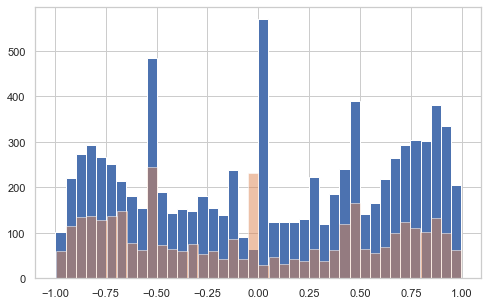

In [128]:
Democrat_quotes['sentiment'].hist(bins=40, figsize = [8,5])
Republican_quotes['sentiment'].hist(bins=40, figsize = [8,5],alpha=0.5)
plt.show()

### Sentiment in function of gender ?

In [129]:
df['gender'].nunique()

11

In [130]:
df['gender'].unique()

array(['female', 'male', nan, 'non-binary', 'transgender female',
       'genderfluid', 'cisgender female', 'transgender male',
       'cisgender male', 'genderqueer', 'shemale', 'intersex'],
      dtype=object)

In [131]:
df.groupby(df.gender).size().sort_values(ascending=False)

gender
female                28286
male                  26274
transgender female       89
non-binary               80
genderfluid              26
transgender male         21
cisgender female         15
genderqueer               4
shemale                   3
intersex                  2
cisgender male            1
dtype: int64

Most of the data is from the male and female genders, so we will currently base our analysis on those two genders :

In [132]:
female_quotes = df.query('gender == "female" ')
male_quotes = df.query('gender == "male" ')

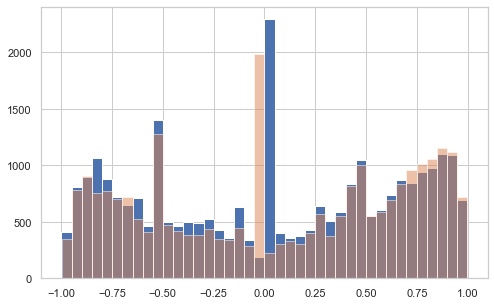

In [133]:
female_quotes['sentiment'].hist(bins=40, figsize = [8,5])
male_quotes['sentiment'].hist(bins=40, figsize = [8,5],alpha=0.5)
plt.show()

# Using other tools and comparing them : 

Reloading the original dataframe: 

In [139]:
df = pd.read_pickle(PATH_GENERATED_DATA+'df_enriched.pkl', compression='infer', storage_options=None)

Vader

In [146]:
df['sentiment_vader'] = df['quotation'].apply(lambda x : analyzer.polarity_scores(x)['compound'])

In [147]:
df['sentiment_vader'].head()

0    0.6271
1    0.6557
2    0.6557
3    0.9460
4    0.6705
Name: sentiment_vader, dtype: float64

Text blob

In [148]:
df['sentiment_blob'] = df['quotation'].apply(lambda x : polarity_blob(x)) 

In [149]:
df['sentiment_blob'].head()

0    0.253283
1    0.500000
2    0.500000
3    0.120000
4    0.133333
Name: sentiment_blob, dtype: float64

Flair 

In [154]:
df['sentiment_flair'] = df['quotation'].apply(lambda x : flair_label(x))  # takes approx 15 minutes to run

In [155]:
df['sentiment_flair'].head()

0    0.766071
1    0.994783
2    0.983703
3    0.989518
4    0.973179
Name: sentiment_flair, dtype: float64

In [18]:
# df_sentiment = df[['quotation','sentiment_vader','sentiment_blob','sentiment_flair']]

df_sentiment.head(30)

,quotation,sentiment_vader,sentiment_blob,sentiment_flair
0,Anything less than women winning 50 per cent o...,0.6271,0.253283,0.766071
1,"more family-friendly and flexible workplaces, ...",0.6557,0.500000,0.994783
2,We need more women and parents in Parliament. ...,0.6557,0.500000,0.983703
3,I'd like to congratulate all the winners and f...,0.9460,0.120000,0.989518
4,Clearly we have got a long way to go before we...,0.6705,0.133333,0.973179
5,I'd like to congratulate all the winners and f...,0.9628,0.120000,0.989818
6,Men and women are different -- equally intelli...,0.7184,0.200000,0.632734
7,30% Club is built on the premise of not just w...,0.9621,0.300000,0.999050
8,If one looks at the history of gender equality...,0.4215,0.000000,0.833747
9,I think we need to place gender equality in th...,0.0000,-0.041667,0.922163


In [ ]:
# Save the dataframe containing the sentiment scores 
# df_sentiment.to_pickle(PATH_GENERATED_DATA+'df_enriched_w_sentiment_allscores.pkl', compression='infer', protocol=5, storage_options=None)

In [9]:
# Load the dataframe containing sentiment scores
df_sentiment = pd.read_pickle(PATH_GENERATED_DATA+'df_enriched_w_sentiment_allscores.pkl', compression='infer', storage_options=None)

First we compare the tools between each other

In [10]:
df_sentiment.describe()

,sentiment_vader,sentiment_blob,sentiment_flair
count,55328.000000,55328.000000,55328.000000
mean,0.054224,0.163196,0.884701
std,0.616717,0.219878,0.139945
min,-0.997900,-1.000000,0.500033
25%,-0.542300,0.000000,0.812941
50%,0.024000,0.144444,0.953504
75%,0.636900,0.300000,0.992212
max,0.997700,1.000000,0.999998


Randomly select 100 quotes :

In [169]:
# ONLY RUN THIS ONCE
# df_sample = df_sentiment.sample(n=100)

Save the 100 randomly selected quotes to a file

In [170]:
# df_sample.to_pickle(PATH_GENERATED_DATA+'df_sentiment_sample.pkl', compression='infer', protocol=5, storage_options=None)

Load the 100 randomly selected quotes :

In [343]:
# df_sample = pd.read_pickle(PATH_GENERATED_DATA+'df_sentiment_sample.pkl', compression='infer', storage_options=None)

In [ ]:
# df_sample_labeled = df_sample

In [11]:
# load labeled samples dataframe
df_sample_labeled = pd.read_pickle(PATH_GENERATED_DATA+'df_sample_labeled.pkl', compression='infer', storage_options=None)

Manually label the quotes :

In [227]:
# Initialise column at -1 so we know what hasn't been labeled yet
# df_sample_labeled['label_younes'] = -1.5 # only run once to avoid overwriting

In [12]:
n=33

In [433]:
n+=1

In [13]:
print('quote number :',n,'\n')
print(df_sample_labeled['quotation'].iloc[n])

print('\nCurrent score :' , df_sample_labeled.at[df_sample_labeled.index[n], 'label_younes'])

quote number : 33 

I am proud to join with Sen. Hagan and Rep. Baldwin to promote gender equality and positive portrayals of women and girls in the media. What children see affects their attitudes toward male and female roles and impacts the value they place on girls and women in society. The Healthy Media for Youth Act will help ensure we are creating a positive media environment for all our children.

Current score : -1.5


In [431]:
# labeling : 0 for negative || 0.5 for neutral || 1 for positive

df_sample_labeled.at[df_sample_labeled.index[n], 'label_younes'] = 1
print(df_sample_labeled.at[df_sample_labeled.index[n], 'label_younes'])

0.5


In [14]:
df_sample_labeled[['quotation','label_younes']].iloc[n-1:n+5]

,quotation,label_younes
19386,Closing the gender gap in labor force particip...,0.5
12649,I am proud to join with Sen. Hagan and Rep. Ba...,-1.5
32422,"I thought, will this be an `artie' movie that ...",-1.5
38171,"In light of recent events, both students and c...",-1.5
2821,My child care plan allows for every parent or ...,-1.5
6913,a win for gender equality,-1.5


In [328]:
# Initialise column at -1 so we know what hasn't been labeled yet
# df_sample_labeled['label_galann'] = -1.5 # only run once to avoid overwriting

In [333]:
n=0

In [337]:
n+=1

In [339]:
print('quote number :',n,'\n')
print(df_sample_labeled['quotation'].iloc[n])

print('\nCurrent score :' , df_sample_labeled.at[df_sample_labeled.index[n], 'label_galann'])

quote number : 1 

modern conscription is gender neutral and will include both women and men.

Current score : -1.5


In [323]:
# labeling : 0 for negative || 0.5 for neutral || 1 for positive

df_sample_labeled.at[df_sample_labeled.index[n], 'label_galann'] = 1
print(df_sample_labeled.at[df_sample_labeled.index[n], 'label_galann'])

1.0


In [ ]:
df_sample_labeled[['quotation','label_galann']].iloc[n-1:n+5]

In [16]:
df_sample_labeled[['quotation','sentiment_vader','sentiment_blob','sentiment_flair','label_younes']].head()

,quotation,sentiment_vader,sentiment_blob,sentiment_flair,label_younes
54581,"Today, the Committee heard Yoni make a compell...",0.4019,0.101190,0.997242,1.0
33050,modern conscription is gender neutral and will...,0.0000,0.200000,0.719044,0.5
44014,The allegations of sexual harassment in the of...,-0.7906,0.033333,0.988527,0.0
12252,When it comes to protecting a women's right to...,0.0000,0.442857,0.581920,1.0
26072,the mental state of young Muslim women who fee...,0.0000,0.066667,0.981104,0.0


In [437]:
# save labeled samples dataframe
 # df_sample_labeled.to_pickle(PATH_GENERATED_DATA+'df_sample_labeled.pkl', compression='infer', protocol=5, storage_options=None)

We add thresholds to separate the data into negative and positive ( should we add neutral ? ) categories :

In [ ]:
# For vader score <0
# df_sentiment['sentiment_vader'].aply
# df_sentiment['sentiment_blob'].aply
# df_sentiment['sentiment_flair'].aply

# for textblob

# for flair

***
### Plot testing

For a first step, sentiment analysis using Vader will be done. We could potentially use other tools such as the current state of the art in sentiment analysis and text classification XLNet, or otherwise DeepMoji or Flair.

In [134]:
def sentiment_plot(scores):
    '''
    This function plots the polarity score for every word in a quote
    inputs : dict containing the polarity score for the whole sentence, 
    and the one for every word of the sentence
    outputs : the plot
    '''
    sns.set(rc={'figure.figsize':(20,3)})
    sns.heatmap(pd.DataFrame(scores).set_index("quotation").T,center=0, annot=True, cmap = "PiYG",annot_kws={"size": 10})

In [135]:
quotation = df['quotation'].loc[1]

In [136]:
analyzer.polarity_scores(quotation)

{'neg': 0.0, 'neu': 0.627, 'pos': 0.373, 'compound': 0.6557}

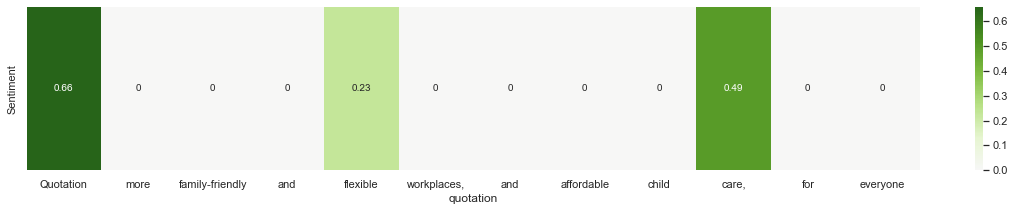

In [137]:
sentiment_plot({
    "quotation":["Quotation"] + quotation.split(),
    "Sentiment":[analyzer.polarity_scores(quotation)["compound"]] + [analyzer.polarity_scores(word)["compound"] for word in quotation.split()]
})